# Setup

## Imports

In [144]:
# Import packages
from pathlib import Path
import pandas as pd
import numpy as np
import geopandas as gpd
import json
from shapely.validation import make_valid
import imp
import warnings
import math

# Plotting packages
import matplotlib
import matplotlib.pyplot as plt
from  matplotlib.colors import LogNorm
import contextily as ctx
import colorcet as cc
from colorcet.plotting import swatch, swatches, sine_combs
import holoviews as hv

## File Paths

In [6]:
# Find your current working directory, which should be folder for this notebook.
#Path.cwd()
root_path = Path('G:/Projects/cl-DRWI')

In [7]:
# Set your project directory to your local folder for your clone of this repository
project_path = root_path
project_path

WindowsPath('G:/Projects/cl-DRWI')

In [8]:
# Path to summaries
summary_path = project_path / Path('DRWI_summary.xlsx')
summary_path.exists()

True

# Load data

In [260]:
total_summary = pd.read_excel(summary_path, sheet_name = 'All')

In [261]:
total_summary = total_summary.set_index('Geographic group')
total_summary

,Sort order,PA Stage,Group,WPF Direct,WPF All,All,Avoided by Protection pos,Remaining,WPF Indirect,State,Avoided by Protection
Geographic group,,,,,,,,,,,
Clusters Total,1,Stage 1,1,15839,NaN,NaN,11475,-8433,0,0,-11475
Brandywine and Christina,2,Stage 1,2,3581,NaN,NaN,0,34905,0,0,0
Kirkwood - Cohansey Aquifer,3,Stage 1,3,1338,NaN,NaN,2020,-115288,0,0,-2020
Middle Schuylkill,4,Stage 1,2,5046,NaN,NaN,0,85682,0,0,0
New Jersey Highlands,5,Stage 1,4,5403,NaN,NaN,1275,33965,0,0,-1275
Poconos and Kittatinny,6,Stage 1,3,0,NaN,NaN,5781,-52073,0,0,-5781
Schuylkill Highlands,7,Stage 1,4,86,NaN,NaN,237,17447,0,0,-237
Upper Lehigh,8,Stage 1,3,0,NaN,NaN,2163,-17676,0,0,-2163
Upstream Suburban Philadelphia,9,Stage 1,2,385,NaN,NaN,0,4605,0,0,0


In [262]:
total_summary = total_summary.fillna(0)

# Format

In [263]:
total_summary = total_summary.drop(['WPF All', 'All', 'Sort order'], axis = 1)

In [264]:
total_summary

,PA Stage,Group,WPF Direct,Avoided by Protection pos,Remaining,WPF Indirect,State,Avoided by Protection
Geographic group,,,,,,,,
Clusters Total,Stage 1,1,15839,11475,-8433,0,0,-11475
Brandywine and Christina,Stage 1,2,3581,0,34905,0,0,0
Kirkwood - Cohansey Aquifer,Stage 1,3,1338,2020,-115288,0,0,-2020
Middle Schuylkill,Stage 1,2,5046,0,85682,0,0,0
New Jersey Highlands,Stage 1,4,5403,1275,33965,0,0,-1275
Poconos and Kittatinny,Stage 1,3,0,5781,-52073,0,0,-5781
Schuylkill Highlands,Stage 1,4,86,237,17447,0,0,-237
Upper Lehigh,Stage 1,3,0,2163,-17676,0,0,-2163
Upstream Suburban Philadelphia,Stage 1,2,385,0,4605,0,0,0


# Plot

## DRB Total

In [265]:
DRB_total = total_summary[total_summary.Group == 5]
DRB_total

,PA Stage,Group,WPF Direct,Avoided by Protection pos,Remaining,WPF Indirect,State,Avoided by Protection
Geographic group,,,,,,,,
DRB Total,Stage 1,5,16106,11087,284308,0,0,-11087
DRB Total,Stage 2,5,17317,3891,682250,311,19937,-3891


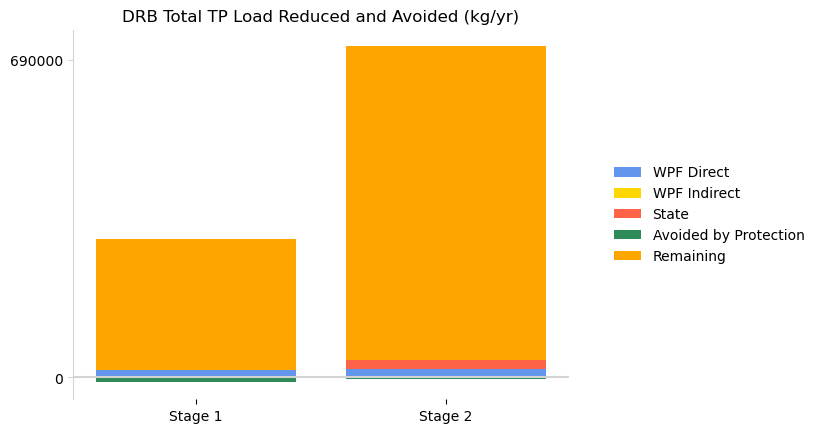

In [267]:
# All stage 1 and all stage 2 
fig, ax = plt.subplots()

ax.bar(DRB_total['PA Stage'], height=DRB_total['WPF Direct'], label='WPF Direct', color='cornflowerblue')

ax.bar(DRB_total['PA Stage'], height=DRB_total['WPF Indirect'], bottom=DRB_total['WPF Direct'], label='WPF Indirect', color='gold')

ax.bar(DRB_total['PA Stage'], height=DRB_total['State'], bottom=DRB_total['WPF Direct'] + DRB_total['WPF Indirect'], label='State', color='tomato')

ax.bar(DRB_total['PA Stage'], height=DRB_total['Avoided by Protection'], label='Avoided by Protection', color='seagreen')

ax.bar(DRB_total['PA Stage'], height=DRB_total['Remaining'], bottom=DRB_total['WPF Direct'] + DRB_total['WPF Indirect'] + DRB_total['State'], label='Remaining', color='orange')


plt.axhline(y=0, color='lightgrey')

ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('lightgrey')
#ax.set_yticks([0, 40000])
ax.set_yticks([0, 690000])
ax.tick_params(axis='y', color= 'lightgrey')
#plt.setp(ax.get_yticklabels(), color='grey')

plt.title('DRB Total TP Load Reduced and Avoided (kg/yr)')

ax.legend(loc='right', frameon=False, bbox_to_anchor=(1.5,0.5))

plt.show()

## Cluster Total

In [307]:
cluster_total = total_summary[total_summary.Group == 1]
cluster_total
stage1_rem = -8433 - 11475 - 15839 
rem = [stage1_rem, 237897]
cluster_total['Remaining'] = rem
cluster_total

C:\Users\clulay\AppData\Local\Temp\ipykernel_22388\3230009197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_total['Remaining'] = rem


,PA Stage,Group,WPF Direct,Avoided by Protection pos,Remaining,WPF Indirect,State,Avoided by Protection
Geographic group,,,,,,,,
Clusters Total,Stage 1,1,15839,11475,-35747,0,0,-11475
Clusters Total,Stage 2,1,16980,3914,237897,285,8831,-3914


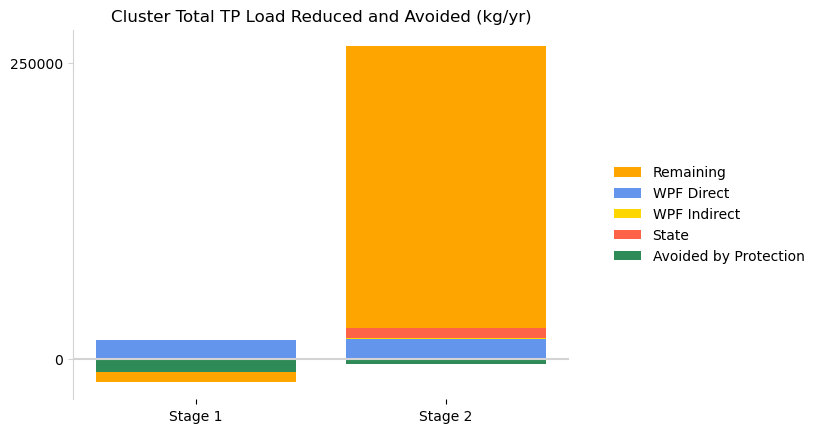

In [308]:
# All stage 1 and all stage 2 
fig, ax = plt.subplots()

ax.bar(cluster_total['PA Stage'], height=cluster_total['Remaining'], bottom=cluster_total['WPF Direct'] + cluster_total['WPF Indirect'] + cluster_total['State'], label='Remaining', color='orange')

ax.bar(cluster_total['PA Stage'], height=cluster_total['WPF Direct'], label='WPF Direct', color='cornflowerblue')

ax.bar(cluster_total['PA Stage'], height=cluster_total['WPF Indirect'], bottom=cluster_total['WPF Direct'], label='WPF Indirect', color='gold')

ax.bar(cluster_total['PA Stage'], height=cluster_total['State'], bottom=cluster_total['WPF Direct'] + cluster_total['WPF Indirect'], label='State', color='tomato')

ax.bar(cluster_total['PA Stage'], height=cluster_total['Avoided by Protection'], label='Avoided by Protection', color='seagreen')

#ax.bar(cluster_total['PA Stage'], height=cluster_total['Remaining'], bottom=cluster_total['Avoided by Protection'], label='Remaining', color='orange')

plt.axhline(y=0, color='lightgrey')

ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('lightgrey')
#ax.set_yticks([0, 40000])
ax.set_yticks([0, 250000])
ax.tick_params(axis='y', color= 'lightgrey')
#plt.setp(ax.get_yticklabels(), color='grey')

plt.title('Cluster Total TP Load Reduced and Avoided (kg/yr)')

ax.legend(loc='right', frameon=False, bbox_to_anchor=(1.5,0.5))

plt.show()

## Cluster Groups

In [297]:
clusters = total_summary
clusters = clusters.drop(['DRB Total', 'Clusters Total'])
clusters['sum'] = clusters['WPF Direct'] + clusters['WPF Indirect'] + clusters['State'] + clusters['Remaining']

clusters


,PA Stage,Group,WPF Direct,Avoided by Protection pos,Remaining,WPF Indirect,State,Avoided by Protection,sum
Geographic group,,,,,,,,,
Brandywine and Christina,Stage 1,2,3581,0,34905,0,0,0,38486
Kirkwood - Cohansey Aquifer,Stage 1,3,1338,2020,-115288,0,0,-2020,-113950
Middle Schuylkill,Stage 1,2,5046,0,85682,0,0,0,90728
New Jersey Highlands,Stage 1,4,5403,1275,33965,0,0,-1275,39368
Poconos and Kittatinny,Stage 1,3,0,5781,-52073,0,0,-5781,-52073
Schuylkill Highlands,Stage 1,4,86,237,17447,0,0,-237,17533
Upper Lehigh,Stage 1,3,0,2163,-17676,0,0,-2163,-17676
Upstream Suburban Philadelphia,Stage 1,2,385,0,4605,0,0,0,4990
Brandywine and Christina,Stage 2,2,4599,0,54645,0,2366,0,61610


In [301]:
g1_clusters = clusters[clusters.Group == 2]

cluster_list = g1_clusters.index.unique().to_list()

In [299]:
g1_clusters

,PA Stage,Group,WPF Direct,Avoided by Protection pos,Remaining,WPF Indirect,State,Avoided by Protection,sum
Geographic group,,,,,,,,,
New Jersey Highlands,Stage 1,4,5403,1275,33965,0,0,-1275,39368
Schuylkill Highlands,Stage 1,4,86,237,17447,0,0,-237,17533
New Jersey Highlands,Stage 2,4,5407,523,36395,113,242,-523,42157
Schuylkill Highlands,Stage 2,4,129,130,18817,0,555,-130,19501


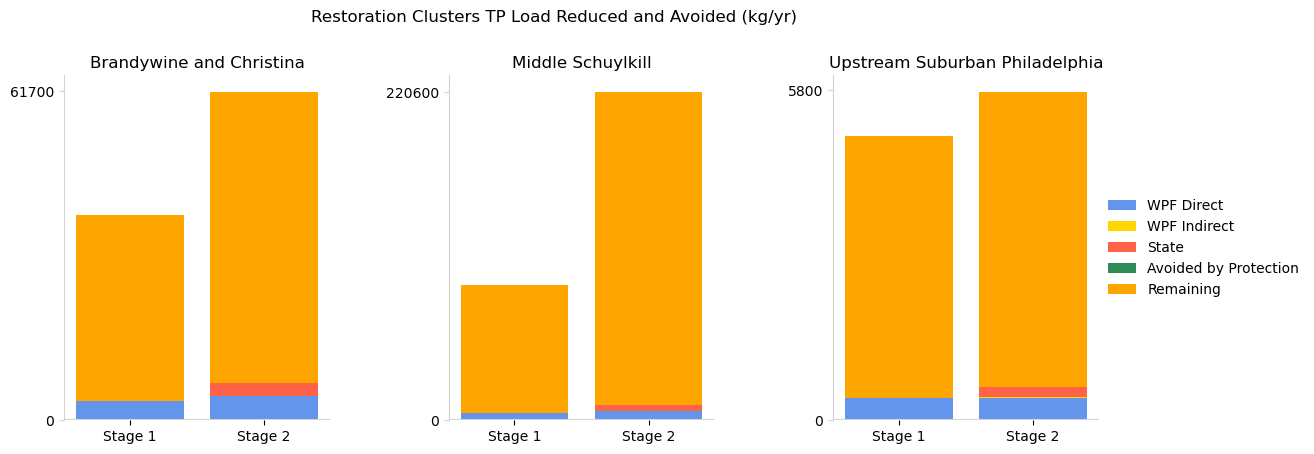

In [309]:
# By cluster
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

n = 1 

for cluster in cluster_list:
    ax = plt.subplot(1, 3 ,n) 

    n = n+1

    cluster_summary = clusters[clusters.index == cluster]

    maxval = np.nanmax(cluster_summary['sum'])
    ylab = int(math.ceil(maxval / 100.0)) * 100 

    ax.bar(cluster_summary['PA Stage'], height=cluster_summary['WPF Direct'], label='WPF Direct', color='cornflowerblue')

    ax.bar(cluster_summary['PA Stage'], height=cluster_summary['WPF Indirect'], bottom=cluster_summary['WPF Direct'], label='WPF Indirect', color='gold')

    ax.bar(cluster_summary['PA Stage'], height=cluster_summary['State'], bottom=cluster_summary['WPF Direct'] + cluster_summary['WPF Indirect'], label='State', color='tomato')

    ax.bar(cluster_summary['PA Stage'], height=cluster_summary['Avoided by Protection'], label='Avoided by Protection', color='seagreen')

    #ax.bar(cluster_summary['PA Stage'], height=cluster_summary['Remaining'], bottom=cluster_summary['Avoided by Protection'], label='Remaining', color='orange')
    ax.bar(cluster_summary['PA Stage'], height=cluster_summary['Remaining'], bottom=cluster_summary['WPF Direct'] + cluster_summary['WPF Indirect'] + cluster_summary['State'], label='Remaining', color='orange')


    plt.axhline(y=0, color='lightgrey')

    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color('lightgrey')
    ax.set_yticks([0, ylab])
    #ax.set_ylim([-1700, 45000])
    ax.tick_params(axis='y', color= 'lightgrey')
    plt.title(cluster)

fig.tight_layout(pad=4)
ax.legend(loc='right', frameon=False, bbox_to_anchor=(1.8,0.5))
fig.suptitle('Restoration Clusters TP Load Reduced and Avoided (kg/yr)')

plt.show()